# Introducción

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns

In [2]:
import plotly.io as pio
pio.renderers.default = "jpg"
# plotting libraries
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
nombre_archivo_excel = "202405 Ejercicio SDA.xlsx"
df_ventas = pd.read_excel(nombre_archivo_excel, sheet_name='VENTAS').reset_index(drop=True)
df_productos = pd.read_excel(nombre_archivo_excel, sheet_name='PRODUCTOS').reset_index(drop=True)
df_clientes = pd.read_excel(nombre_archivo_excel, sheet_name='CLIENTES').reset_index(drop=True)

In [4]:
# revisando que no existan nulos 
tablas = [df_ventas,df_productos,df_clientes]
for tabla in tablas:
    print("#############")
    print(tabla.isna().any())
    print(tabla.dtypes)

#############
CLIENTE_ID     False
PRODUCTO_ID    False
DIA            False
INGRESOS       False
UNIDADES       False
dtype: bool
CLIENTE_ID              int64
PRODUCTO_ID            object
DIA            datetime64[ns]
INGRESOS              float64
UNIDADES              float64
dtype: object
#############
PRODUCTO_ID                   False
DESCRIPCION_PRODUCTO          False
CATEGORIA                     False
SUBCATEGORIA                  False
CONSUMO PERSONAL O FAMILAR    False
MARCA                         False
MATERIAL_ENVASE               False
SABOR                         False
UNIDADES_EMPAQUE              False
PRESENTACION_DESC             False
dtype: bool
PRODUCTO_ID                   object
DESCRIPCION_PRODUCTO          object
CATEGORIA                     object
SUBCATEGORIA                  object
CONSUMO PERSONAL O FAMILAR    object
MARCA                         object
MATERIAL_ENVASE               object
SABOR                         object
UNIDADES_EMPAQUE       

**Tenemos una data envidiablemente limpia!!!!**

# Sesión de ideas

Antes de comenzar siempre me gusta pensar un poco acerca de las tablas y hacersme preguntas que me gustaría responder o saber de las tablas.

De la tabla ventas:
+ Existen nuevos productos y productos obsoletos (se dejaron de vender)?
+ Incluso si existierán nuevos productos, puedo hacer análisis globales y comparar crecimientos de ventas a pesar que el set de productos sea distinto? (probablemente sí porque son todos de la categoría de bebestibles)
Notemos que hay solo una pregunta donde se pregunta algo acerca del cliente “El Económico”.
En las tablas hay mucha información que podría ser relevante para otros análisis, pero no hay pregunta ni de localización, tipo de envase, subproducto, etc. Lo que se solicita son análisis simples. Variables a considerar para análisis.
+ Día
+ ingresos
+ categoría (más "relevante" durante 2021)
+ marca (mayor crecimiento durante 2020-2021)
+ producto unidades (más vendida marzo-21)
+ cuota de mercado ingreso de cliente "El Económico" (2020-2021)

Dos variables nuevas a crear: "cuota mercado" y "cremiento ingreso"  por marca

Solicitan además: 

graficar visualizar  :
+ Tendencia histórica mensual del mercado por categoría. 
+ Marca líder por categoría en el último año (mix por categoría). 


# Trabajo
## Creación tabla con toda data relevante y limpieza data

In [5]:
df_productos.columns

Index(['PRODUCTO_ID', 'DESCRIPCION_PRODUCTO', 'CATEGORIA', 'SUBCATEGORIA',
       'CONSUMO PERSONAL O FAMILAR', 'MARCA', 'MATERIAL_ENVASE', 'SABOR',
       'UNIDADES_EMPAQUE', 'PRESENTACION_DESC'],
      dtype='object')

In [6]:
# pequeña limpieza 
print(df_productos['MARCA'].unique())
# nótese que pepito esta repetida pero con una ","
df_productos['MARCA'] = df_productos['MARCA'].apply(lambda x: "PEPITO" if x=='PEPITO,' else x)
print("después de limpieza")
print(df_productos['MARCA'].unique())

['COLA' 'PEPITO' 'AWUITA' 'PEPITO,' 'LIMON' 'COLA ZERO' 'NARANJA']
después de limpieza
['COLA' 'PEPITO' 'AWUITA' 'LIMON' 'COLA ZERO' 'NARANJA']


In [7]:
df_ventas.head(2)

,CLIENTE_ID,PRODUCTO_ID,DIA,INGRESOS,UNIDADES
0,5000001458,ZZ8817,2020-07-02,1.400000e+08,11.99930
1,5000001458,ZZ8843,2021-01-15,3.552000e+03,586.47405


In [8]:
df_productos.head(2)

,PRODUCTO_ID,DESCRIPCION_PRODUCTO,CATEGORIA,SUBCATEGORIA,CONSUMO PERSONAL O FAMILAR,MARCA,MATERIAL_ENVASE,SABOR,UNIDADES_EMPAQUE,PRESENTACION_DESC
0,ZZ8811,COLA 1.5L NR 8u PT,GASEOSA,COLAS,FAMILIARES (MS),COLA,PET,ORIGINAL,8U,VIDRIO
1,ZZ8812,COLA 1.0L NR 8u PT,GASEOSA,COLAS,FAMILIARES (MS),COLA,PET,ORIGINAL,8U,VIDRIO


In [9]:
big_table_aux = df_ventas.merge(df_productos, on='PRODUCTO_ID',how='left')
big_table_aux.head(1)

,CLIENTE_ID,PRODUCTO_ID,DIA,INGRESOS,UNIDADES,DESCRIPCION_PRODUCTO,CATEGORIA,SUBCATEGORIA,CONSUMO PERSONAL O FAMILAR,MARCA,MATERIAL_ENVASE,SABOR,UNIDADES_EMPAQUE,PRESENTACION_DESC
0,5000001458,ZZ8817,2020-07-02,1.400000e+08,11.9993,PEPITO NECTAR PERA 946ML,JUGO,JUGOS Y NECTARES,FAMILIARES (MS),PEPITO,TETRAPACK,PERA,12U,ALUMINIO


In [10]:
df_clientes.head(2)

,CLIENTE_ID,NOMBRE_CLIENTE,CANAL,CLASIFICACION_CLIENTE,REGION,CUIDAD
0,5000001458,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE
1,1105829148,EL ECONOMICO,HIPERMERCADO,ORO,II,ESTE


In [11]:
big_table = big_table_aux.merge(df_clientes, on='CLIENTE_ID',how='left')

In [12]:
big_table.tail(2)

,CLIENTE_ID,PRODUCTO_ID,DIA,INGRESOS,UNIDADES,DESCRIPCION_PRODUCTO,CATEGORIA,SUBCATEGORIA,CONSUMO PERSONAL O FAMILAR,MARCA,MATERIAL_ENVASE,SABOR,UNIDADES_EMPAQUE,PRESENTACION_DESC,NOMBRE_CLIENTE,CANAL,CLASIFICACION_CLIENTE,REGION,CUIDAD
3803,5000001458,ZZ8839,2021-06-11,1.11,0.125050,LIMON QUINADA LATA 12 OZ,GASEOSA,SABORES,PERSONALES (SS),LIMON,ALUMINIO,QUINADA,12U,PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE
3804,5000001458,ZZ8821,2020-01-10,0.88,0.119166,PEPITO NECTAR LATA MELOCOTON,JUGO,JUGOS Y NECTARES,PERSONALES (SS),PEPITO,ALUMINIO,MELOCOTON,24U,PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE


## revisión de Outliers

In [13]:
# hay dos datos que se usan mucho unidades e ingresos los revisaremos estén dentro de rango
big_table[['INGRESOS','UNIDADES ']].describe()

,INGRESOS,UNIDADES
count,3.805000e+03,3805.000000
mean,3.688703e+04,18.068667
std,2.269606e+06,27.628993
min,8.800000e-01,0.119166
25%,2.010000e+01,3.998600
50%,4.386000e+01,10.567200
75%,9.834000e+01,19.510390
max,1.400000e+08,586.474050


In [14]:
big_table = big_table.sort_values(by='INGRESOS', ascending=False).reset_index(drop=True)
big_table

,CLIENTE_ID,PRODUCTO_ID,DIA,INGRESOS,UNIDADES,DESCRIPCION_PRODUCTO,CATEGORIA,SUBCATEGORIA,CONSUMO PERSONAL O FAMILAR,MARCA,MATERIAL_ENVASE,SABOR,UNIDADES_EMPAQUE,PRESENTACION_DESC,NOMBRE_CLIENTE,CANAL,CLASIFICACION_CLIENTE,REGION,CUIDAD
0,5000001458,ZZ8817,2020-07-02,1.400000e+08,11.999300,PEPITO NECTAR PERA 946ML,JUGO,JUGOS Y NECTARES,FAMILIARES (MS),PEPITO,TETRAPACK,PERA,12U,ALUMINIO,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE
1,5000001458,ZZ8843,2021-01-15,3.552000e+03,586.474050,COLA1.5 LTS PET 12UDS,GASEOSA,COLAS,FAMILIARES (MS),COLA,PET,CLASICA,12U,REF PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE
2,5000001458,ZZ8824,2021-02-26,2.208480e+03,240.846300,COLA12 OZ LATA 12 UDS,GASEOSA,COLAS,PERSONALES (SS),COLA,ALUMINIO,CLASICA,12U,PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE
3,5000001458,ZZ8824,2021-04-09,2.132800e+03,232.593000,COLA12 OZ LATA 12 UDS,GASEOSA,COLAS,PERSONALES (SS),COLA,ALUMINIO,CLASICA,12U,PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE
4,5000001458,ZZ8843,2021-02-26,1.958400e+03,323.353260,COLA1.5 LTS PET 12UDS,GASEOSA,COLAS,FAMILIARES (MS),COLA,PET,CLASICA,12U,REF PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,1105107487,ZZ8826,2020-03-31,3.350000e+00,0.333900,8PK COLAMINILATA,GASEOSA,COLAS,PERSONALES (SS),COLA,ALUMINIO,CLASICA,8U,ALUMINIO,SUPER EXPRES,SUPERMERCADO,PLATA,I,CENTRO
3801,1105829148,ZZ8840,2021-11-06,2.160000e+00,0.317025,LIMON GINGER ALE 600 ML 12 UDS PET,GASEOSA,SABORES,PERSONALES (SS),LIMON,PET,GINGER ALE,12U,POST MIX (BAG IN BOX,EL ECONOMICO,HIPERMERCADO,ORO,II,ESTE
3802,1105829148,ZZ8820,2021-08-12,1.360000e+00,0.178750,PEPITO NECTAR LATA MANZANA,JUGO,JUGOS Y NECTARES,PERSONALES (SS),PEPITO,ALUMINIO,MANZANA,24U,PET,EL ECONOMICO,HIPERMERCADO,ORO,II,ESTE
3803,5000001458,ZZ8839,2021-06-11,1.110000e+00,0.125050,LIMON QUINADA LATA 12 OZ,GASEOSA,SABORES,PERSONALES (SS),LIMON,ALUMINIO,QUINADA,12U,PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE


In [15]:
1.400000e+08/3.552000e+03

39414.414414414416

Notemos que los ingresos del día 2020-07-02 en jugos son cerca de 40.000 veces más grandes que la del siguiente más grande.
Probablemente este datos este equivocado, por lo que derechamente se borrará.

In [16]:
big_table.drop(index=[0], inplace=True)

In [17]:
big_table.sort_values(by='UNIDADES ', ascending=False).head(4)

,CLIENTE_ID,PRODUCTO_ID,DIA,INGRESOS,UNIDADES,DESCRIPCION_PRODUCTO,CATEGORIA,SUBCATEGORIA,CONSUMO PERSONAL O FAMILAR,MARCA,MATERIAL_ENVASE,SABOR,UNIDADES_EMPAQUE,PRESENTACION_DESC,NOMBRE_CLIENTE,CANAL,CLASIFICACION_CLIENTE,REGION,CUIDAD
1,5000001458,ZZ8843,2021-01-15,3552.00,586.47405,COLA1.5 LTS PET 12UDS,GASEOSA,COLAS,FAMILIARES (MS),COLA,PET,CLASICA,12U,REF PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE
4,5000001458,ZZ8843,2021-02-26,1958.40,323.35326,COLA1.5 LTS PET 12UDS,GASEOSA,COLAS,FAMILIARES (MS),COLA,PET,CLASICA,12U,REF PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE
5,5000001458,ZZ8843,2021-10-01,1747.20,288.48183,COLA1.5 LTS PET 12UDS,GASEOSA,COLAS,FAMILIARES (MS),COLA,PET,CLASICA,12U,REF PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE
2,5000001458,ZZ8824,2021-02-26,2208.48,240.84630,COLA12 OZ LATA 12 UDS,GASEOSA,COLAS,PERSONALES (SS),COLA,ALUMINIO,CLASICA,12U,PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE


In [18]:
# Las unidades parecen bien!!

## Categoría más relevante

In [19]:
big_table['anho'] = big_table['DIA'].dt.year

In [20]:
categoria_anho = big_table[['anho','CATEGORIA','INGRESOS']].groupby(by=['anho','CATEGORIA']).sum().reset_index()
categoria_anho_2021 = categoria_anho[categoria_anho['anho']==2021]

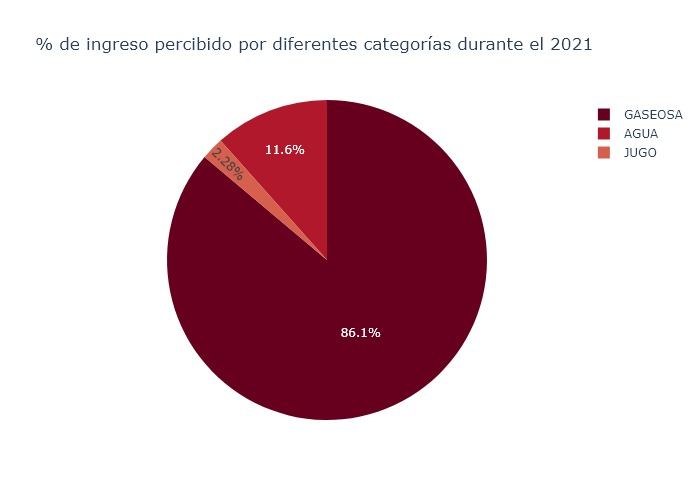

In [21]:
fig = px.pie(categoria_anho_2021, values='INGRESOS', names='CATEGORIA', title='% de ingreso percibido por diferentes categorías durante el 2021',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

**Notese que este es un gráfico simple, podríamos hacer un treemap para ver por ejemplo si algunos clientes tiene otros productos más relevantes.** Acá se ve que la gaseosa es la categoría con mayores ingresos.

## Marca mayor crecimiento

In [22]:
marca_anho = big_table[['anho','MARCA','INGRESOS']].groupby(by=['anho','MARCA']).sum().reset_index()

In [23]:
marca_anho.sort_values(by=['MARCA','anho'],inplace=True)
marca_anho

,anho,MARCA,INGRESOS
0,2020,AWUITA,18023.48
6,2021,AWUITA,24171.89
1,2020,COLA,91791.54
7,2021,COLA,134874.52
2,2020,COLA ZERO,17013.48
8,2021,COLA ZERO,22233.64
3,2020,LIMON,11650.50
9,2021,LIMON,18392.47
4,2020,NARANJA,2920.42
10,2021,NARANJA,4055.83


In [24]:
marca_anho['INGRESO AÑO ANTERIOR'] = marca_anho["INGRESOS"].shift(1)
marca_anho_2021 = marca_anho[marca_anho['anho']==2021].copy()
marca_anho
# esta  tabla es sólo para comparar con la de abajo

,anho,MARCA,INGRESOS,INGRESO AÑO ANTERIOR
0,2020,AWUITA,18023.48,NaN
6,2021,AWUITA,24171.89,18023.48
1,2020,COLA,91791.54,24171.89
7,2021,COLA,134874.52,91791.54
2,2020,COLA ZERO,17013.48,134874.52
8,2021,COLA ZERO,22233.64,17013.48
3,2020,LIMON,11650.50,22233.64
9,2021,LIMON,18392.47,11650.50
4,2020,NARANJA,2920.42,18392.47
10,2021,NARANJA,4055.83,2920.42


In [25]:
marca_anho_2021['crecimiento %'] = (marca_anho_2021['INGRESOS'] - marca_anho_2021['INGRESO AÑO ANTERIOR'])/marca_anho_2021['INGRESO AÑO ANTERIOR']
marca_anho_2021['crecimiento nominal'] = marca_anho_2021['INGRESOS'] - marca_anho_2021['INGRESO AÑO ANTERIOR']
marca_anho_2021.sort_values('crecimiento nominal', ascending=False)

,anho,MARCA,INGRESOS,INGRESO AÑO ANTERIOR,crecimiento %,crecimiento nominal
7,2021,COLA,134874.52,91791.54,0.469357,43082.98
9,2021,LIMON,18392.47,11650.50,0.578685,6741.97
6,2021,AWUITA,24171.89,18023.48,0.341133,6148.41
8,2021,COLA ZERO,22233.64,17013.48,0.306825,5220.16
10,2021,NARANJA,4055.83,2920.42,0.388783,1135.41
11,2021,PEPITO,4743.47,5268.32,-0.099624,-524.85


## Porcentaje venta cliente “El Económico”

In [26]:
big_table.DIA.min()

Timestamp('2020-01-02 00:00:00')

In [27]:
big_table.DIA.max()

Timestamp('2021-11-29 00:00:00')

Nótese que nos piden 2 años pero tenemos el 2020 completo y el año 2021 hasta noviembre, así que tenemos casi los 2 años pero no los 2 exacto. Cómo piden el % en los 2 años es un groupby solo por cliente e ingreso.

In [28]:
cliente_ingreso_2_anhos_aux = big_table[['CLIENTE_ID','INGRESOS']].groupby(by=['CLIENTE_ID']).sum().reset_index()
cliente_ingreso_2_anhos = cliente_ingreso_2_anhos_aux.merge(df_clientes,on='CLIENTE_ID',how='left').copy()
cliente_ingreso_2_anhos[['CLIENTE_ID','NOMBRE_CLIENTE','INGRESOS']]

,CLIENTE_ID,NOMBRE_CLIENTE,INGRESOS
0,1105107487,SUPER EXPRES,94048.96
1,1105829148,EL ECONOMICO,115445.37
2,5000001458,SUPER SUPER,145645.23


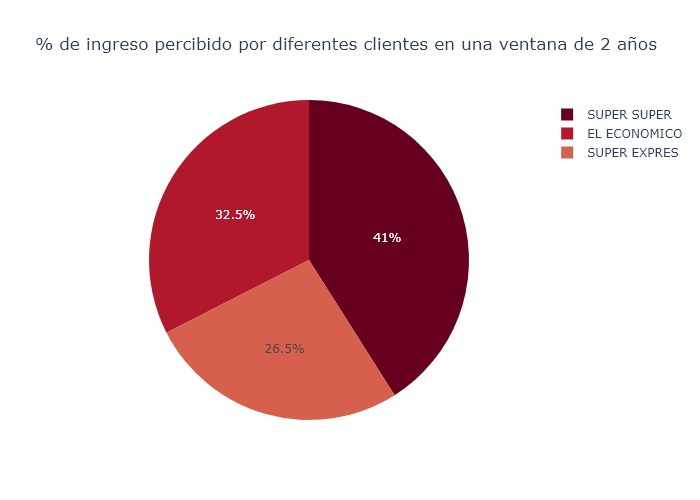

In [39]:
fig = px.pie(cliente_ingreso_2_anhos, values='INGRESOS', names='NOMBRE_CLIENTE', 
             title='% de ingreso percibido por diferentes clientes en una ventana de 2 años',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

El local "super super" concentra más del 99.9% de los ingresos en el último año (dada la data que tenemos disponibles).

## Productos en Unidades más vendidas

In [30]:
big_table.columns

Index(['CLIENTE_ID', 'PRODUCTO_ID', 'DIA', 'INGRESOS', 'UNIDADES ',
       'DESCRIPCION_PRODUCTO', 'CATEGORIA', 'SUBCATEGORIA',
       'CONSUMO PERSONAL O FAMILAR', 'MARCA', 'MATERIAL_ENVASE', 'SABOR',
       'UNIDADES_EMPAQUE', 'PRESENTACION_DESC', 'NOMBRE_CLIENTE', 'CANAL',
       'CLASIFICACION_CLIENTE', 'REGION', 'CUIDAD', 'anho'],
      dtype='object')

In [31]:
producto_dia = big_table[['DIA','PRODUCTO_ID','UNIDADES ']].groupby(by=['DIA','PRODUCTO_ID']).sum().reset_index()
producto_marzo_2021 = producto_dia[(producto_dia['DIA']>="2021-03-01")&(producto_dia['DIA']<"2021-04-01")].copy()
producto_marzo_2021_agrupado = producto_marzo_2021[['PRODUCTO_ID','UNIDADES ']].groupby(by=['PRODUCTO_ID']).sum().reset_index()

In [32]:
producto_marzo_2021_agrupado.sort_values(by=['UNIDADES '], ascending=False,inplace=True)
producto_marzo_2021_agrupado_final = producto_marzo_2021_agrupado.merge(df_productos,how='left',on='PRODUCTO_ID')
producto_marzo_2021_agrupado_final[['PRODUCTO_ID','DESCRIPCION_PRODUCTO','UNIDADES ']]

,PRODUCTO_ID,DESCRIPCION_PRODUCTO,UNIDADES
0,ZZ8823,AWUITA 6L,313.839900
1,ZZ8835,COLA600 ML 12 UDS TERMO,228.046650
2,ZZ8833,COLA2.5 L 8 UDS PET TERMOENCOG,172.597600
3,ZZ8832,COLA3 LT PET TERMO,129.974100
4,ZZ8843,COLA1.5 LTS PET 12UDS,110.954550
5,ZZ8827,COLASin AZUCAR 600ml NR Pet12u,107.995762
6,ZZ8834,LIMON 2.5 LT,56.798697
7,ZZ8826,8PK COLAMINILATA,48.624186
8,ZZ8828,COLA Sin AZUCAR 354 ml LAT NR 12u PT,43.892550
9,ZZ8822,2 PACK AWUITA 2L (6 Unidades),40.154600


## Gráficos solicitados

In [33]:
big_table['MES'] = 12*big_table['DIA'].dt.year + big_table['DIA'].dt.month - 12*2020
big_table

,CLIENTE_ID,PRODUCTO_ID,DIA,INGRESOS,UNIDADES,DESCRIPCION_PRODUCTO,CATEGORIA,SUBCATEGORIA,CONSUMO PERSONAL O FAMILAR,MARCA,...,SABOR,UNIDADES_EMPAQUE,PRESENTACION_DESC,NOMBRE_CLIENTE,CANAL,CLASIFICACION_CLIENTE,REGION,CUIDAD,anho,MES
1,5000001458,ZZ8843,2021-01-15,3552.00,586.474050,COLA1.5 LTS PET 12UDS,GASEOSA,COLAS,FAMILIARES (MS),COLA,...,CLASICA,12U,REF PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE,2021,13
2,5000001458,ZZ8824,2021-02-26,2208.48,240.846300,COLA12 OZ LATA 12 UDS,GASEOSA,COLAS,PERSONALES (SS),COLA,...,CLASICA,12U,PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE,2021,14
3,5000001458,ZZ8824,2021-04-09,2132.80,232.593000,COLA12 OZ LATA 12 UDS,GASEOSA,COLAS,PERSONALES (SS),COLA,...,CLASICA,12U,PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE,2021,16
4,5000001458,ZZ8843,2021-02-26,1958.40,323.353260,COLA1.5 LTS PET 12UDS,GASEOSA,COLAS,FAMILIARES (MS),COLA,...,CLASICA,12U,REF PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE,2021,14
5,5000001458,ZZ8843,2021-10-01,1747.20,288.481830,COLA1.5 LTS PET 12UDS,GASEOSA,COLAS,FAMILIARES (MS),COLA,...,CLASICA,12U,REF PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE,2021,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,1105107487,ZZ8826,2020-03-31,3.35,0.333900,8PK COLAMINILATA,GASEOSA,COLAS,PERSONALES (SS),COLA,...,CLASICA,8U,ALUMINIO,SUPER EXPRES,SUPERMERCADO,PLATA,I,CENTRO,2020,3
3801,1105829148,ZZ8840,2021-11-06,2.16,0.317025,LIMON GINGER ALE 600 ML 12 UDS PET,GASEOSA,SABORES,PERSONALES (SS),LIMON,...,GINGER ALE,12U,POST MIX (BAG IN BOX,EL ECONOMICO,HIPERMERCADO,ORO,II,ESTE,2021,23
3802,1105829148,ZZ8820,2021-08-12,1.36,0.178750,PEPITO NECTAR LATA MANZANA,JUGO,JUGOS Y NECTARES,PERSONALES (SS),PEPITO,...,MANZANA,24U,PET,EL ECONOMICO,HIPERMERCADO,ORO,II,ESTE,2021,20
3803,5000001458,ZZ8839,2021-06-11,1.11,0.125050,LIMON QUINADA LATA 12 OZ,GASEOSA,SABORES,PERSONALES (SS),LIMON,...,QUINADA,12U,PET,SUPER SUPER,HIPERMERCADO,PLATA,I,NORTE,2021,18


In [34]:
tabla_categoria_mes = big_table[['MES','CATEGORIA','INGRESOS']].groupby(by=['MES','CATEGORIA']).sum().reset_index().copy() 

In [35]:
tabla_categoria_mes.sort_values(by=['INGRESOS'], ascending=False)

,MES,CATEGORIA,INGRESOS
44,16,GASEOSA,23065.58
53,19,GASEOSA,19672.69
35,13,GASEOSA,19165.09
62,22,GASEOSA,18169.34
59,21,GASEOSA,17836.43
...,...,...,...
11,4,JUGO,128.04
32,12,AGUA,92.28
15,6,AGUA,86.28
63,22,JUGO,85.52


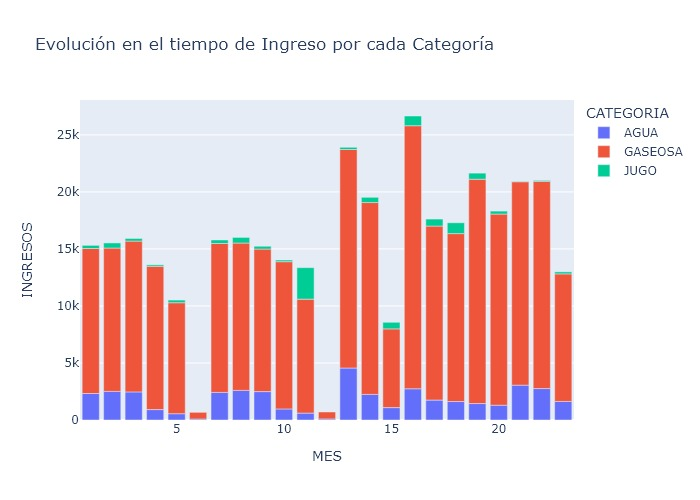

In [40]:
fig = px.bar(tabla_categoria_mes, x="MES", y="INGRESOS", color="CATEGORIA", title="Evolución en el tiempo de Ingreso por cada Categoría")
fig.show()

In [37]:
tabla_categoria_marca_2021 = big_table[big_table['anho']==2021][['MARCA','CATEGORIA','INGRESOS']].groupby(by=['MARCA','CATEGORIA']).sum().reset_index().copy() 

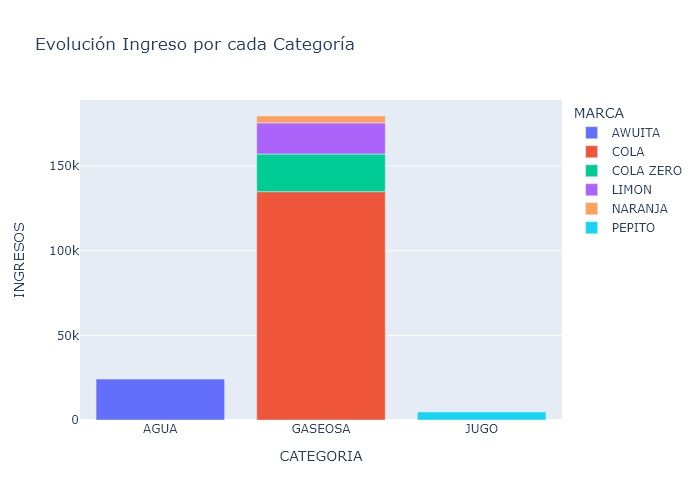

In [38]:
fig = px.bar(tabla_categoria_marca_2021, x="CATEGORIA", y="INGRESOS", color="MARCA", 
             title="Evolución Ingreso por cada Categoría")
fig.show()

Las categorías jugo y agua tienen solo una marca. Por tanto awuita y pepito son marcas liderés. En gaseosa la ganadora entre 4 marcas es Cola, seguida de Cola Zero. 